# Alucar - Analisando as vendas

## 01.03 Análise das Vendas

In [4]:
import pandas as pd

In [5]:
pd.read_csv('data/alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [6]:
alucar = pd.read_csv('data/alucar.csv')

In [7]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [8]:
print('Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [9]:
print('Quantidade de dados nulos: ', alucar.isna().sum().sum())

Quantidade de dados nulos:  0


In [10]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [11]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [12]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [13]:
# !pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [14]:
print(sns.__version__)

0.9.0


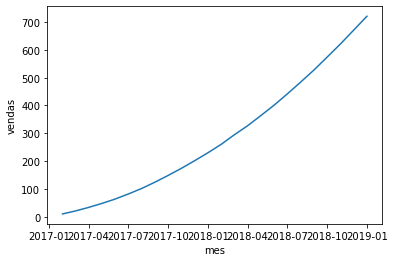

In [15]:
sns.lineplot(x='mes', y='vendas', data=alucar)

## 01.04 Aperfeiçoando o Gráfico

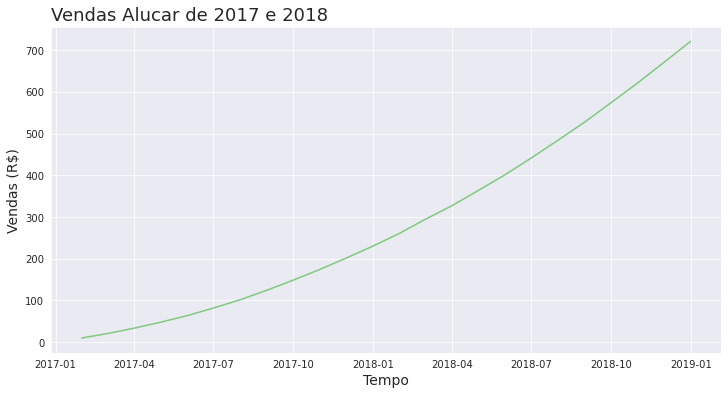

In [16]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax


## 01.06 Para saber mais: Crescimento proporcional entre linhas (time series) utilizando pandas

Quando trabalhamos com sequências de dados que representam pontos no tempo (time series) é muito comum entender o crescimento de um valor em função do tempo. Por exemplo, o preço de um produto ou uma ação que antes era 100 e agora 110 cresceu 110/100 - 1 = 10%, e depois se caiu para 105, caiu 105/110 - 1 = -4%.

Portanto a fórmula geral é valor / valor_anterior - 1. Em python podemos gerar alguns dados aleatórios:

In [17]:
import numpy as np
import pandas as pd

np.random.seed(234)
aleatorios = np.random.randint(low = 950, high = 1050, size=100)
df = pd.DataFrame(aleatorios, columns=["preco"])
df.head()

,preco
0,1022
1,981
2,1018
3,1007
4,1045


Como o valor da linha n+1 vai ser dividido pelo valor da linha n temos algo como:

In [18]:
# linhas na posicao posterior (n+1): df.preco.shift(-1)
# linhas na posicao atual (n): df.preco

df['crescimento'] = df.preco.shift(-1).div(df.preco) - 1
df.head()

,preco,crescimento
0,1022,-0.040117
1,981,0.037717
2,1018,-0.010806
3,1007,0.037736
4,1045,-0.059330


Mas, claro, como toda boa análise básica de time series, o pandas já fornece uma função do gênero para trabalharmos:

In [19]:
df['crescimento_direto'] = df.preco.pct_change()
df.head()

,preco,crescimento,crescimento_direto
0,1022,-0.040117,NaN
1,981,0.037717,-0.040117
2,1018,-0.010806,0.037717
3,1007,0.037736,-0.010806
4,1045,-0.059330,0.037736


In [20]:
df.tail()

,preco,crescimento,crescimento_direto
95,961,-0.010406,-0.001040
96,951,0.084122,-0.010406
97,1031,-0.037827,0.084122
98,992,-0.037298,-0.037827
99,955,NaN,-0.037298


## 02.01 Decompondo as vendas

In [21]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [22]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


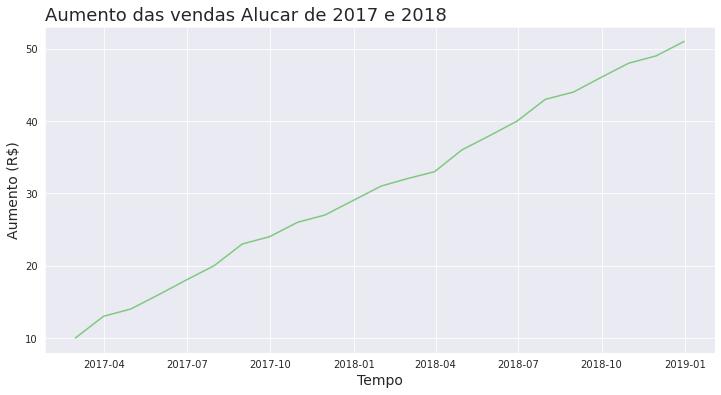

In [23]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento (R$)', fontsize=14)
ax = ax

In [24]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

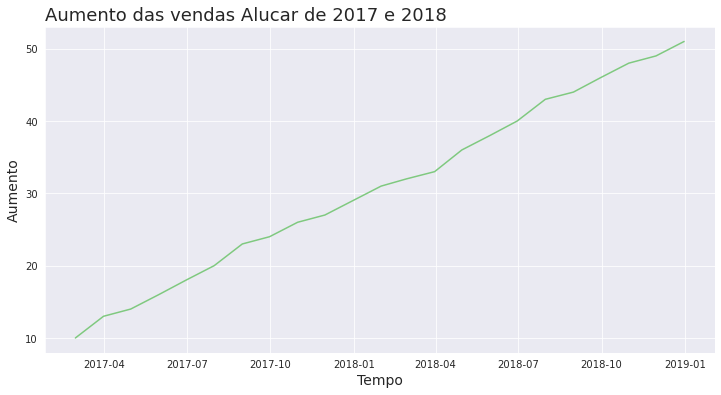

In [25]:
plotar('Aumento das vendas Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [26]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


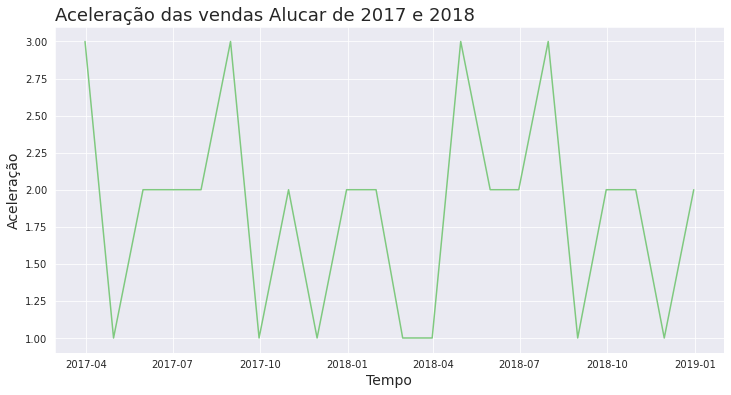

In [27]:
plotar('Aceleração das vendas Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

## 02.02 Observação e tendência

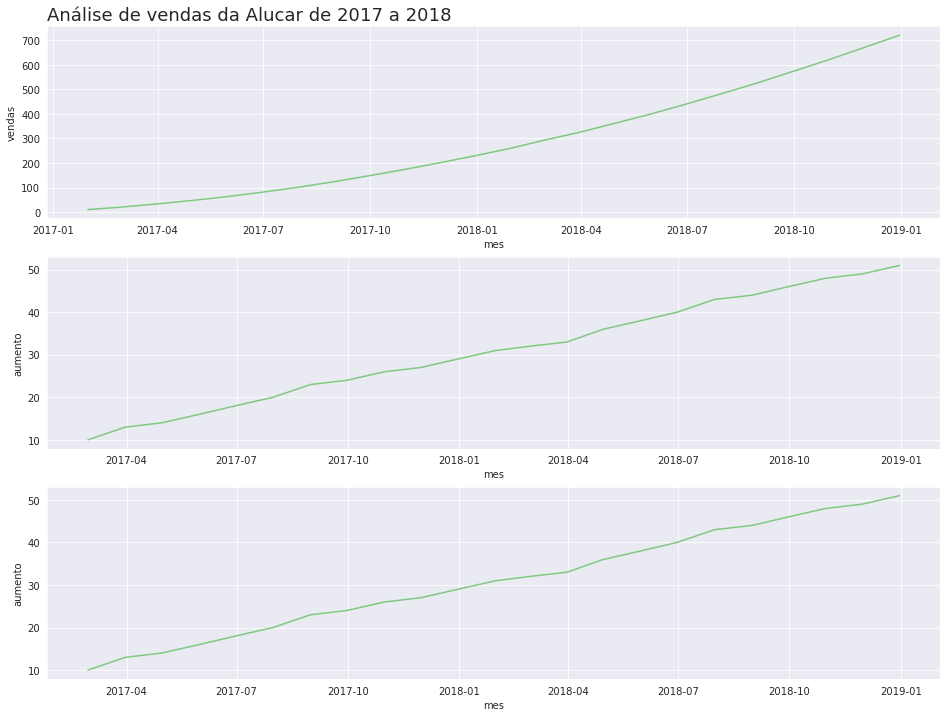

In [28]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de vendas da Alucar de 2017 a 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [29]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

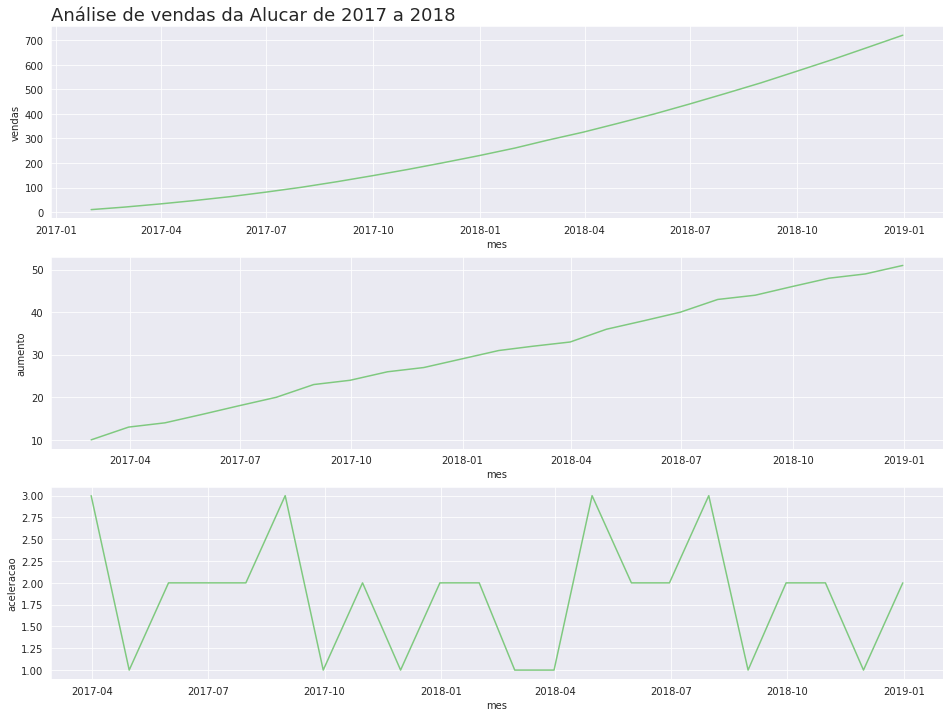

In [30]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise das vendas da Alucar de 2017 a 2018')